# NEXFLIX MOVIES/TV SHOWS ANALYSIS

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from flixable which is a third-party Netflix search engine and can be obtained from kaggle.

Dataset at https://www.kaggle.com/shivamb/netflix-shows

## NETFLIX ANALYSIS PROVIDES INSIGHTS ON THE FOLLOWING;

1.	Analysis on the distribution of tv shows to movies
2.	Top 10 Genres of movies on Netflix. 
3.	Top 10 Genres of tv shows on Netflix.
4.	Top 10 Countries as contributer to Netflix.
5.	Analysis on Rating
6.	Understanding what content is available in different countries
7.  Latest to oldest movies on Netflix
8.  Distribution of movies/tv shows added to Netflix monthly and over the years
9.	Distribution of movies/tv shows released over the years on Netflix
10. Netflix growth over the years(Licenced vs Original)


In [1]:
#import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os, sys
import warnings
warnings.filterwarnings('ignore')
import pandas.util.testing as tm

In [2]:
#import datasets
data = pd.read_csv('/Users/wuraolaifeoluwa/Documents/Rasheed data doc /datasets/netflix_titles.csv')

In [3]:
#check for shape of data
data.shape

(7787, 12)

In [4]:
#view first 5 columns of the dataset
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In this data set, there are 12 features.

show_id = Unique ID for every Movie / TV Show

type = Identifier - A Movie / TV Show

title = Title of Movie / TV Show

director = Director of the Movie

cast = Actors involved in the Movie / TV Show

country = Country where the Movie / TV Show was produced

data_added = Date it was added on Netflix

release_year = Actual Release year of the Movie / TV Show

rating = TV Rating of the Movie / TV Show

duration = Total Duration - in minutes or number of seasons

Let's overview each feature and figure out how to use them to visualization.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## EXPLORATORY DATA ANALYSIS

## FEATURE ENGINEERING AND DATA CLEANING

In [6]:
#check for null values
data.isnull().values.any()

True

In [7]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

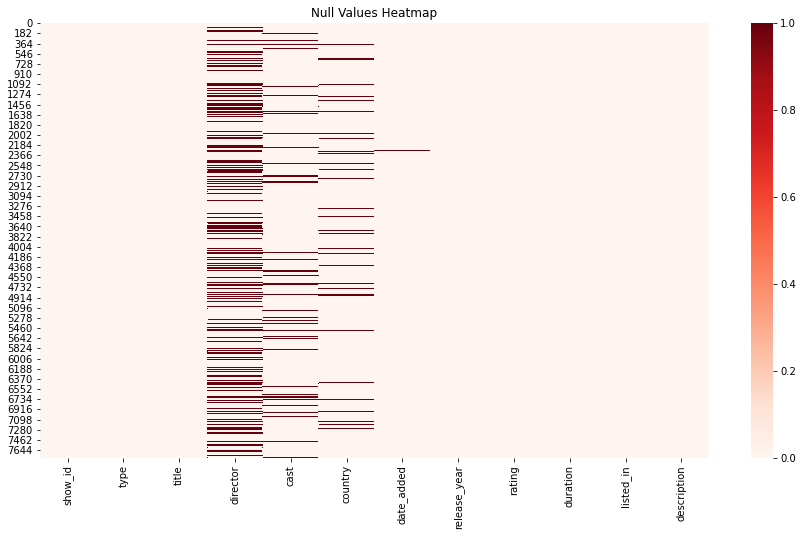

In [8]:
#lets visualize the missing values
plt.figure(figsize = (15,8))

sns.heatmap(data.isnull(),cmap = 'Reds')
plt.title('Null Values Heatmap')
plt.show()

There are a few columns that contain null values ('director', 'cast', 'country', 'date_added', 'rating').

In [9]:
#we drop the 'director' and 'cast' column
data = data.drop(['director', 'cast'], axis = 1)

## RATING

In [10]:
#since its a categorical data, I will fill the missing values with the 'mode' i.e most occuring 
data['rating'].mode()[0]

'TV-MA'

In [11]:
data['rating'] = data.rating.fillna(data['rating'].mode()[0])

## DATE

In [14]:
data['date_added'].unique()

array(['August 14, 2020', 'December 23, 2016', 'December 20, 2018', ...,
       'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [15]:
# use forward fill method to fill missing values in the 'date_added' datasets
data['date_added'] = data.date_added.fillna(method ='ffill')

# COUNTRY

In [16]:
data['country'].mode()[0]

'United States'

In [17]:
data['country'] = data.country.fillna(data['country'].mode()[0])

## Drop columns not needed ('description')

In [18]:
#drop columns not needed
data = data.drop(['description'], axis = 1)

## Rename columns 'listed_in' to 'Genre'

In [60]:
#rename columns
data.rename(columns = {'listed_in' : 'Genre',}, inplace = True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   country       7787 non-null   object
 4   date_added    7787 non-null   object
 5   release_year  7787 non-null   int64 
 6   rating        7787 non-null   object
 7   duration      7787 non-null   object
 8   Genre         7787 non-null   object
dtypes: int64(1), object(8)
memory usage: 547.6+ KB


In [20]:
data.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
Genre           0
dtype: int64

I used describe() on the data to get the summary of numeric values along with analytical data like min, max, standard deviation, count, and percentage slabs. 

In [21]:
data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


Since, describe() will skip analysis information if column's datatype is string, I extracted column names that are strings to get their statistical analysis such as count, unique, top and frequency.

In [22]:
stats = data[['type','title','country','date_added','rating','duration','Genre']].describe().T
stats

,count,unique,top,freq
type,7787,2,Movie,5377
title,7787,7787,Black Lightning,1
country,7787,681,United States,3062
date_added,7787,1565,"January 1, 2020",118
rating,7787,14,TV-MA,2870
duration,7787,216,1 Season,1608
Genre,7787,492,Documentaries,334


In [23]:
data.head()

,show_id,type,title,country,date_added,release_year,rating,duration,Genre
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies"
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies"
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas


# VISUALIZATION

## Analysis on the distribution of tv shows to movies

Movie      5377
TV Show    2410
Name: type, dtype: int64


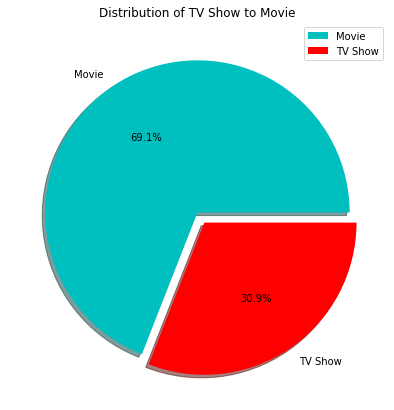

In [62]:
print(data['type'].value_counts())
plt.figure(figsize = (15,7))

plt.pie(data['type'].value_counts(),
       labels = [ 'Movie', 'TV Show'],
       colors = ['c','r'],
       shadow = True,
        explode = (0,0.08),
        autopct ='%1.1f%%',
        labeldistance = 1.1
       )

plt.legend(['Movie', 'TV Show'])
plt.title('Distribution of TV Show to Movie')
plt.show() 

Observation

This shows that Movie has a higher viewers rate of 69.1% to TV Shows with a rate 30.9%. Clearly users explore more Movies than TV Shows on Netflix.  This is because that it for a longer time, has users end up spending more time on Netflix and zest to watch more movie develops.

## Top 10 Genres of movies on Netflix. 

In [25]:
#extracting tv shows and movies from the type column
data_show = data[data["type"] == "TV Show"]

data_Movie = data[data["type"] == "Movie"]

Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Dramas, International Movies, Romantic Movies       153
Name: Genre, dtype: int64


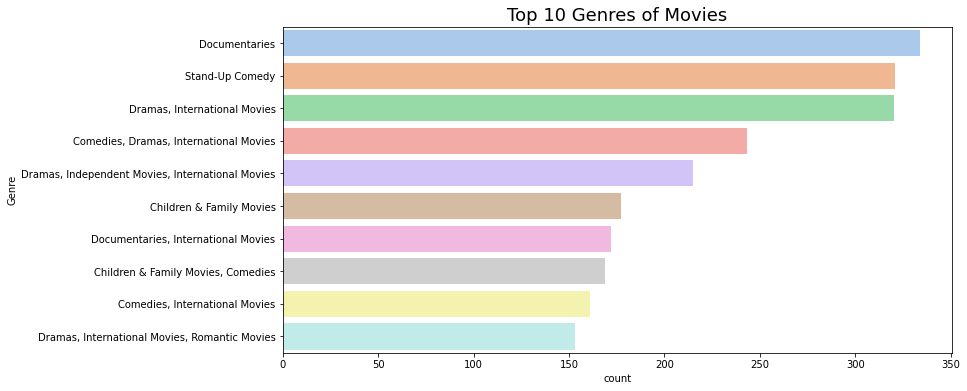

In [26]:
print(data_Movie["Genre"].value_counts()[:10])
plt.figure(figsize=(12,6))
sns.countplot(y='Genre',data = data_Movie, order = data_Movie["Genre"].value_counts().index[0:10],palette="pastel")

plt.title("Top 10 Genres of Movies",size=18)
plt.show()

Observation

The shows that documentaries (334) have the highest genre rate of movies users explore on Netflix, followed by stand-up comedy (321) and Dramas, International Movies (320).

## Top 10 Genres of TV shows on Netflix. 

Kids' TV                                                      205
International TV Shows, TV Dramas                             111
Crime TV Shows, International TV Shows, TV Dramas             106
Kids' TV, TV Comedies                                          90
International TV Shows, Romantic TV Shows, TV Dramas           86
Reality TV                                                     83
International TV Shows, Romantic TV Shows, TV Comedies         79
Anime Series, International TV Shows                           75
Docuseries                                                     74
International TV Shows, Korean TV Shows, Romantic TV Shows     65
Name: Genre, dtype: int64


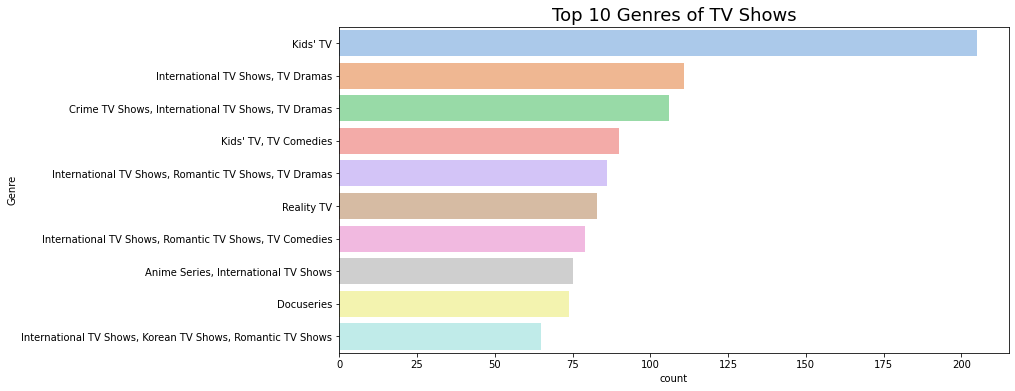

In [63]:
print(data_show["Genre"].value_counts()[:10])
plt.figure(figsize=(12,6))
sns.countplot(y = 'Genre',data = data_show, order = data_show["Genre"].value_counts().index[0:10], palette="pastel")

plt.title("Top 10 Genres of TV Shows", size=18)
plt.show()

Observation

The shows that Kids' TV (205) has the highest genre rate of TV Shows users explore on Netflix, followed by International TV Shows, TV Dramas (111), and Crime TV Shows (106).

## Top 10 Countries as contributer to netflix.

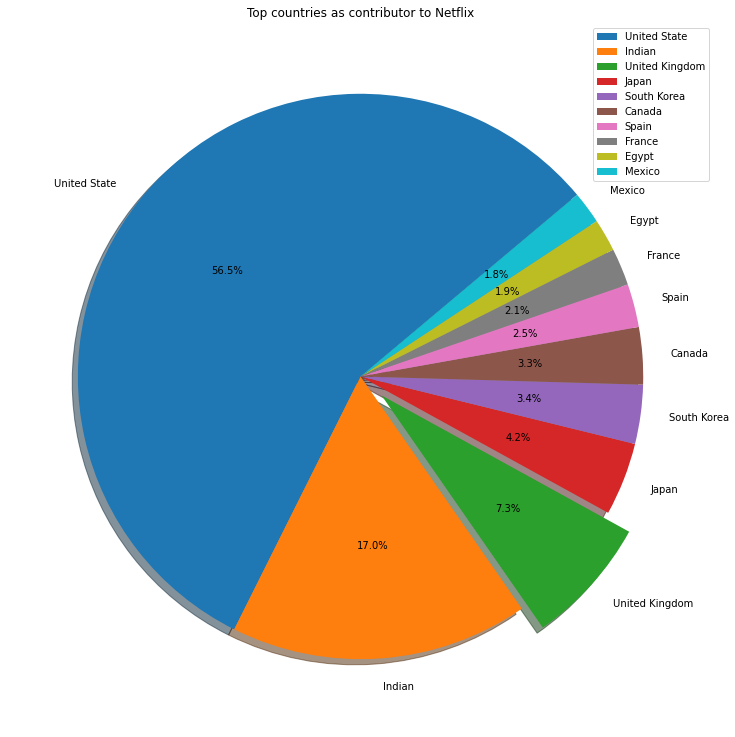

In [29]:
plt.figure(figsize=(20,13))

plt.pie(data['country'].value_counts()[:10],
        labels = ['United State', 'Indian', 'United Kingdom', 'Japan','South Korea','Canada', 'Spain','France','Egypt','Mexico'],
        shadow = True,
        labeldistance = 1.1,
        startangle = 40,
        explode = (0,0,0.1,0,0,0,0,0,0,0),
        autopct ='%1.1f%%')

plt.legend(['United State', 'Indian', 'United Kingdom', 'Japan','South Korea','Canada', 'Spain','France','Egypt','Mexico'])
plt.title('Top countries as contributor to Netflix')
plt.show()

Observation

The United States has the highest contributor followed by Indian with 17.0% and United Kingdom with 7.3%. The United States has a major stake with 56.5% of shows on Netflix. This is because Netflix is owned by the United State.

## Distribution of the type of movies/tv shows watched in the top country contributors

United States     3062
India              923
United Kingdom     397
Japan              226
South Korea        183
Name: country, dtype: int64


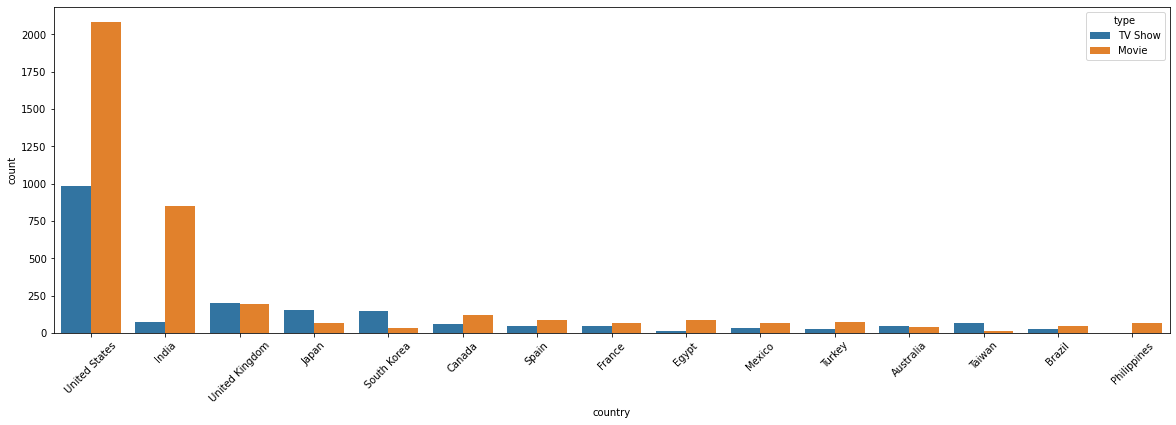

In [30]:
print(data["country"].value_counts().head())
plt.figure(figsize=(20,6))
sns.countplot(x= "country",data= data,hue= "type",order = data['country'].value_counts().index[0:15])
plt.xticks(rotation = 45)
plt.show()

OBSERVATION

Unsurprisingly, the United States stands out in both movies and tv shows because Netflix is an American company. India surprisingly ranks second in the film, followed by the UK. This result shows movies are mostly viewed in countries contributing to Netflix than Tv shows.

## Analysis on Rating

<AxesSubplot:xlabel='rating', ylabel='count'>

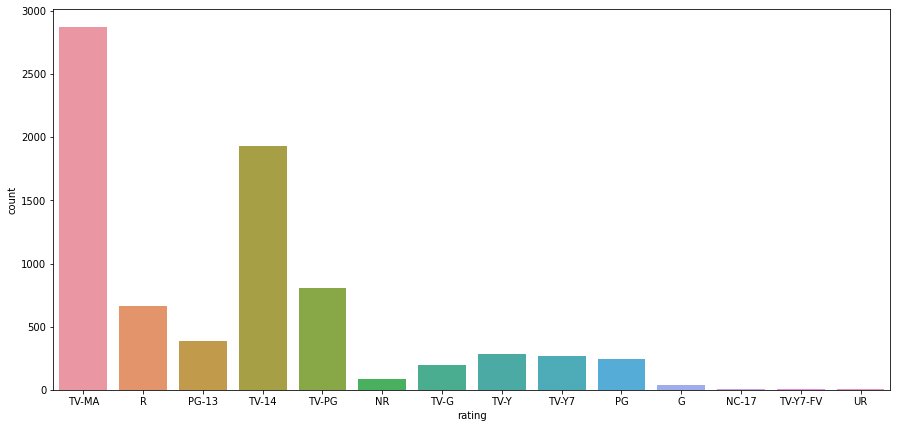

In [31]:
plt.figure(figsize=(15,7))
sns.countplot('rating', data=data)

Observation

1 -Programming rated TV-MA in the United States by the TV Parental Guidelines signifies content for mature audiences.

2 -Programming rated TV-14 in the United States TV Parental Guidelines signifies content with parents strongly cautioned. Content may be inappropriate for children younger than 14 years of age.

3 -An R-rated film is a film that has been assessed as having material that may be unsuitable for children under the age of 17.

The plot above shows that Programming rated TV-MA has the highest rate, programming rated TV-14 ranks second followed by R-rated film. We can conclude from the findings that Netflix majorly comprises movies and tv shows rated TV-MA, TV-14, and R-rated films.


## Distribution of rating and movies/tv shows

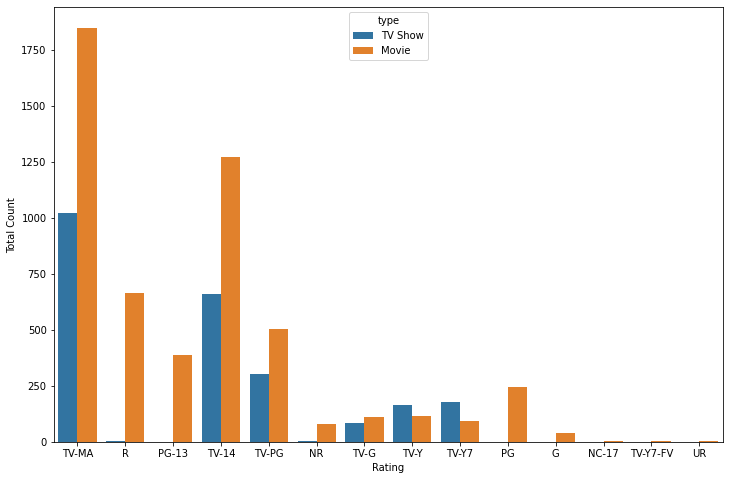

In [32]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating', data = data, hue='type')
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

observation

From the plot, movies are mostly rated TV-MA and TV-14 than Tv shows. Unsurprisingly, all R-rated films are movies this is because most adults and humans older than 17 understand the context and content of movies than a child or teenager.

# Understanding what content is available in different countries

## Analysis on kids show

In [51]:
kids_show = data[data['Genre'] == "Kids' TV"]
kids_show[['title','country','release_year']].head(10)

,title,country,release_year
111,44 Cats,Italy,2018
276,Abby Hatcher,"United States, Canada",2019
434,Alphablocks,United Kingdom,2014
598,Ask the StoryBots,United States,2019
706,Bal Ganesh,United States,2019
735,Barbie Dreamhouse Adventures,"United States, Canada",2018
736,Barbie Dreamhouse Adventures: Go Team Roberts,United States,2020
760,Bat Pat,Italy,2016
779,Be-Be-Bears,Russia,2018
786,Beat Bugs,"Australia, Canada",2018


## Analysis on Horror movies

In [52]:
Horror = data[data['Genre'] == 'Horror Movies']
Horror[['title','country','release_year']].head(10)

,title,country,release_year
261,A.M.I.,Canada,2019
417,All the Boys Love Mandy Lane,United States,2006
1551,Cult of Chucky,United States,2017
1654,Deadcon,United States,2019
1671,Death House,United States,2017
1673,Death of Me,"United States, Thailand",2020
1811,Don't Be Afraid of the Dark,"United States, Australia, Mexico",2010
1976,Eli,United States,2019
2104,Family Blood,United States,2018
2165,Final Destination 3,"United States, Germany",2006


## Analysis on Action and Adventure

In [53]:
Action_Adv = data[data['Genre'] == 'Action & Adventure']
Action_Adv[['title','country','release_year']].head(10)

,title,country,release_year
50,"10,000 B.C.","United States, South Africa",2008
71,16 Blocks,"United States, Germany",2006
89,24 Hours to Live,"South Africa, China, United States",2017
96,3 Days to Kill,"United States, France, Serbia",2014
298,Act of Valor,United States,2012
302,Acts of Violence,Canada,2018
419,All the Devil's Men,United Kingdom,2018
454,American Assassin,United States,2017
518,Angel Has Fallen,United States,2019
634,Avengement,United Kingdom,2019


Observation

To understand content available in different countries, I randomly selected 3 genres of films to give an overview of movies/tv shows available in different countries. My observation shows kid’s content is available and viewed in many countries such as United States, Italy, Canada, and others in the table above. Also, Horror movie content is viewed mostly in United States, Canada, Thailand, Mexico, and other above. Lastly, Action and Adventure content is mostly viewed in South Africa, Germany, China, United States, and others above.

## Distribution of Oldest and latest movies on netflix

In [56]:
oldest = data.sort_values(by = 'release_year', ascending = True)
oldest[['title','release_year']][:5]

,title,release_year
4867,Pioneers: First Women Filmmakers*,1925
6117,The Battle of Midway,1942
4960,Prelude to War,1942
7679,WWII: Report from the Aleutians,1943
7342,Undercover: How to Operate Behind Enemy Lines,1943


In [58]:
latest = data.sort_values(by = 'release_year', ascending = False)
latest[['title','release_year']][:5]

,title,release_year
2327,Gabby's Dollhouse,2021
4468,Night Stalker: The Hunt for a Serial Killer,2021
2753,History of Swear Words,2021
5103,Ratones Paranoicos: The Band that Rocked Argen...,2021
1355,Chris Rock Total Blackout: The Tamborine Exten...,2021


Observation

This table above shows Netflix’s oldest movie to be 'Pioneers: First Women Filmmakers*’ and was released in 1925. while Netflix’s latest movie is 'Gabby's Dollhouse' released in 2021.

## Distribution of movies/tv shows added to Netflix monthly and over the years

In [33]:
#use lambda function to create year_added and month_added features
year_func = lambda x:x.split(',')[-1]
data['year_added'] = data['date_added'].apply(year_func)

month_func = lambda x:x.split(' ')[0]
data['month_added'] = data['date_added'].apply(month_func)

data.head()

,show_id,type,title,country,date_added,release_year,rating,duration,Genre,year_added,month_added
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",2016,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",2018,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",2017,November
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,2020,January


Text(0.5, 1.0, 'movies/tv shows added to Netflix monthly')

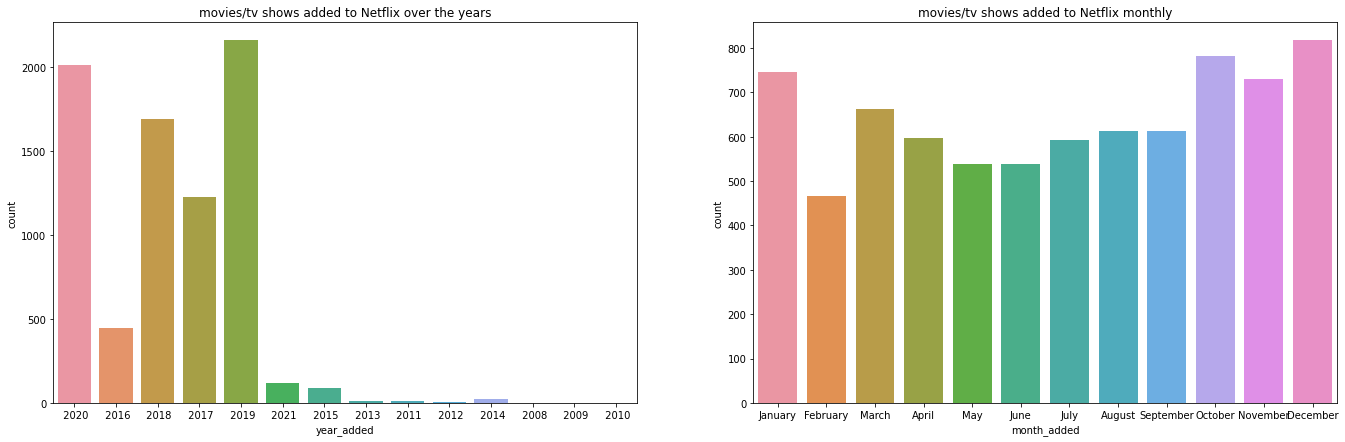

In [35]:
fig, ax = plt.subplots(1,2, figsize = (23, 7))
plot1 = sns.countplot('year_added', data = data, ax = ax[0]);
plot1.set_title('movies/tv shows added to Netflix over the years')

plot2 = sns.countplot("month_added", data = data, order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
                      ax = ax[1]);
plot2.set_title('movies/tv shows added to Netflix monthly')

Observation

From my observation in the first plot, 2019 shows the highest number of movies/tv shows added to Netflix over the years, followed by 2020 and 2018. From the second plot, December shows the highest number of movies/tv shows added to Netflix monthly, followed by October and January.

## Distribution of movies/tv_shows released yearly on netflix

<AxesSubplot:xlabel='release_year', ylabel='Density'>

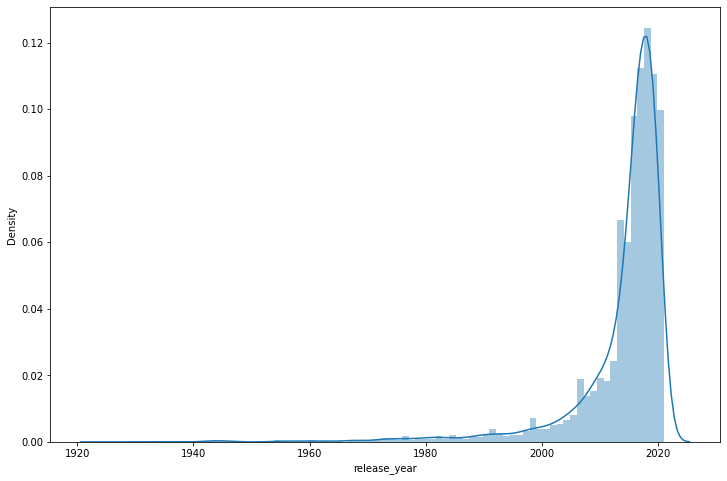

In [36]:
plt.figure(figsize = (12,8))
sns.distplot(data['release_year'], bins = 83)

Observation

This plot shows Netflix released a high number of movies in the 20s and it’s still growing to date.

## Netflix growth over the years(Licenced vs Original)

<AxesSubplot:xlabel='release_year'>

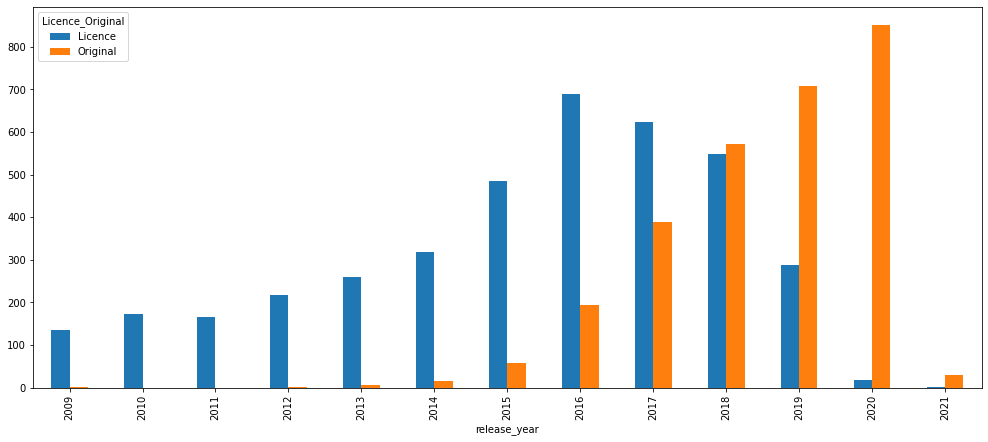

In [45]:
data['year_added'] = data['year_added'].astype('int64')
data['release_year'] = data['release_year'].astype('int64')
data['Licence_Original'] = data['release_year'] == data['year_added']
a = {True : 'Original', False:'Licence'}

data['Licence_Original'] = data['Licence_Original'].map(a)
pivot = data[data['release_year'] > 2008].pivot_table('show_id', index = 'release_year', columns ='Licence_Original', aggfunc ='count')
pivot.plot(kind='bar',figsize=(17, 7))

Observation

Growth of Netflix over the years, let’s assume that the 'release_year' are the years that Netflix released its original movie/shows. while 'date_added' are movies/shows added to Netflix i.e. Netflix acquired a license for the movies to be viewed on Netflix 

This shows Netflix’s original films started way back in the 20s but it has been constantly increasing since 2014 till date. Interestingly, Netflix has grown strong and now it is producing its own shows more.
